# **<font color='magenta'>Visualizing application logs with Matplotlib</font>**

## *<font color='navy'>Introdutcion:</font>*<br>
Within the domain of computing and software engineering, logs play a pivotal role as they function as an electronic chronicle,<br> meticulously documenting the sequence of events, actions, and errors transpiring within a system or application.<br> Essentially, they represent a digital diary for machines, capturing a chronological narrative encompassing a broad spectrum of activities, from user interactions to intricate system processes.<br> Scrutinizing logs is foundational in information technology and software development, offering invaluable insights into system robustness,<br> performance optimization, and security fortification.<br> An essential facet of log analysis entails the vigilant monitoring of warnings and errors contained therein.<br> These warnings and errors are precursors to potential operational challenges, underscoring the critical importance of diligent oversight to maintain the seamless functionality of systems and applications.<br> In this lab, we will parse an application log and visualize the evolution of errors and warnings raised over time.

## *<font color='navy'>Data Set:</font>*<br>
**1- TimeStamp** (Date and Time)<br>
**2- Execution ID** (Integer): An auto increment ID related to the data pipeline job.<br>
**3- Event type** (Text):<br>
   *- Error:* This log entry is generated once an error occurs during the data pipeline execution.<br>
   *- Warning:* This log entry is raised when some non-critical issues may cause a defect in the processed data or affect the data pipeline performance.<br>
   *- Information:* This log entry is to inform about a normal activity.<br>
**4- Details** (Text): The additional information about the log entry (Exception thrown, warning message,...)


<font color='navy'>Importing the necessary libraries:</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

<font color='navy'>Reading the CSV file:</font>

In [2]:
df=pd.read_csv('log_data.csv',delimiter=';',header=None,names=['Timestamp','Execution ID','MessageType','Message'])

In [3]:
# Converting Timestamp to DateTime:
df['Timestamp']=pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df


,Timestamp,Execution ID,MessageType,Message
0,2023-08-30 09:00:00,1,information,Pipeline started execution.
1,2023-08-30 09:00:01,1,warning,Data extraction warning: Establishing connecti...
2,2023-08-30 09:00:01,1,warning,Data extraction warning: High memory usage det...
3,2023-08-30 09:00:01,1,warning,Data extraction warning: Incomplete data recei...
4,2023-08-30 09:00:05,1,information,Initializing data extraction.
...,...,...,...,...
77,2023-08-30 09:06:38,4,information,Initializing data loading.
78,2023-08-30 09:06:40,4,information,Data loading in progress.
79,2023-08-30 09:06:45,4,warning,Data loading warning: Data validation failed.
80,2023-08-30 09:06:50,4,information,Data loading completed successfully.


### Pivot table:<br>
In the world of data, pivoting data is a data processing technique used to reshape tabular data by converting rows into columns.<br>
Pivoting is generally used for data analysis and visualization.

In [6]:
pivot_df=df.pivot_table(index='Timestamp', columns='MessageType',values='Message',aggfunc='count',fill_value=0)

In [10]:
#Reseting the index of the pivot table so that timestamp will return as a regular column.
pivot_df.reset_index(inplace=True)

Plotting the Data

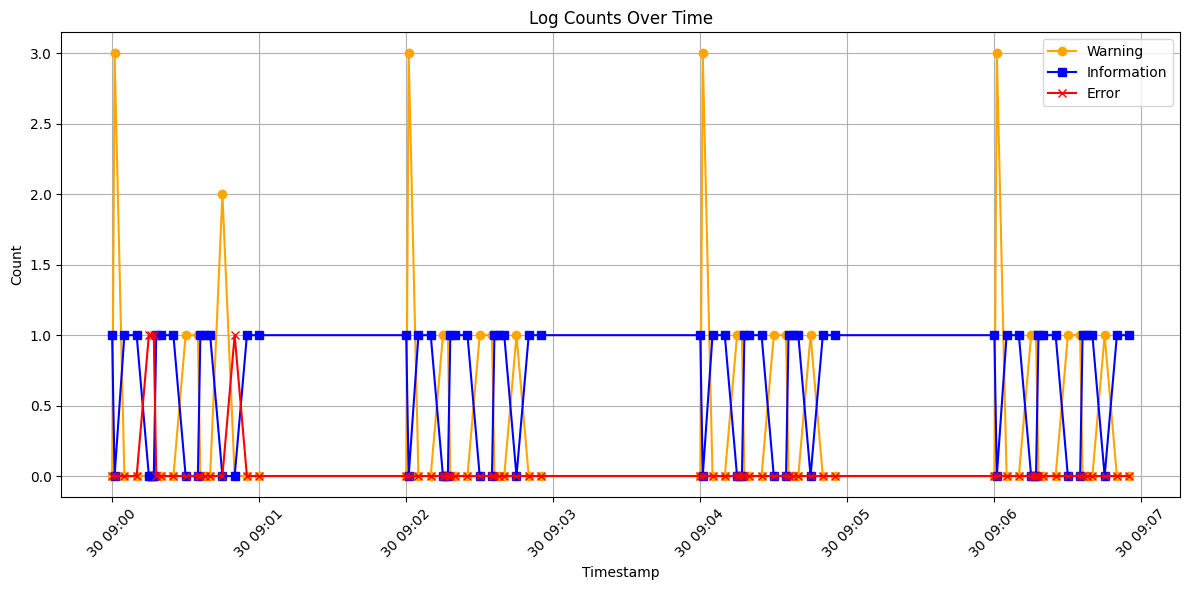

In [16]:
plt.figure(figsize=(12,6))
plt.plot(pivot_df['Timestamp'],pivot_df['warning'],label='Warning',marker='o',color='orange')
plt.plot(pivot_df['Timestamp'], pivot_df['information'], label='Information', marker='s', color= 'blue')
plt.plot(pivot_df['Timestamp'], pivot_df['error'], label='Error', marker='x', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Log Counts Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The visualized data is not very clear since the lines are overlapping and cannot be read easily.<br>
Since the three lines have the same measurement unit, plotting on a second Y-axis will not affect the 
plotted lines.<br> Maybe separating these lines makes it easier to interpret them

### Plotting each data series on a separate subplot (Facets or subplots)<br>
In this section, we must create three separate subplots, one for each message type (Warning, Information, Error), with their Y-axes.<br>Each subplot contains the corresponding line chart, and the x-axis labels are shared among the subplots for consistency.<br>This is why we should copy the previous code into a new Python script and replace the lines of code that create the plot in the previous section with the code explained below.

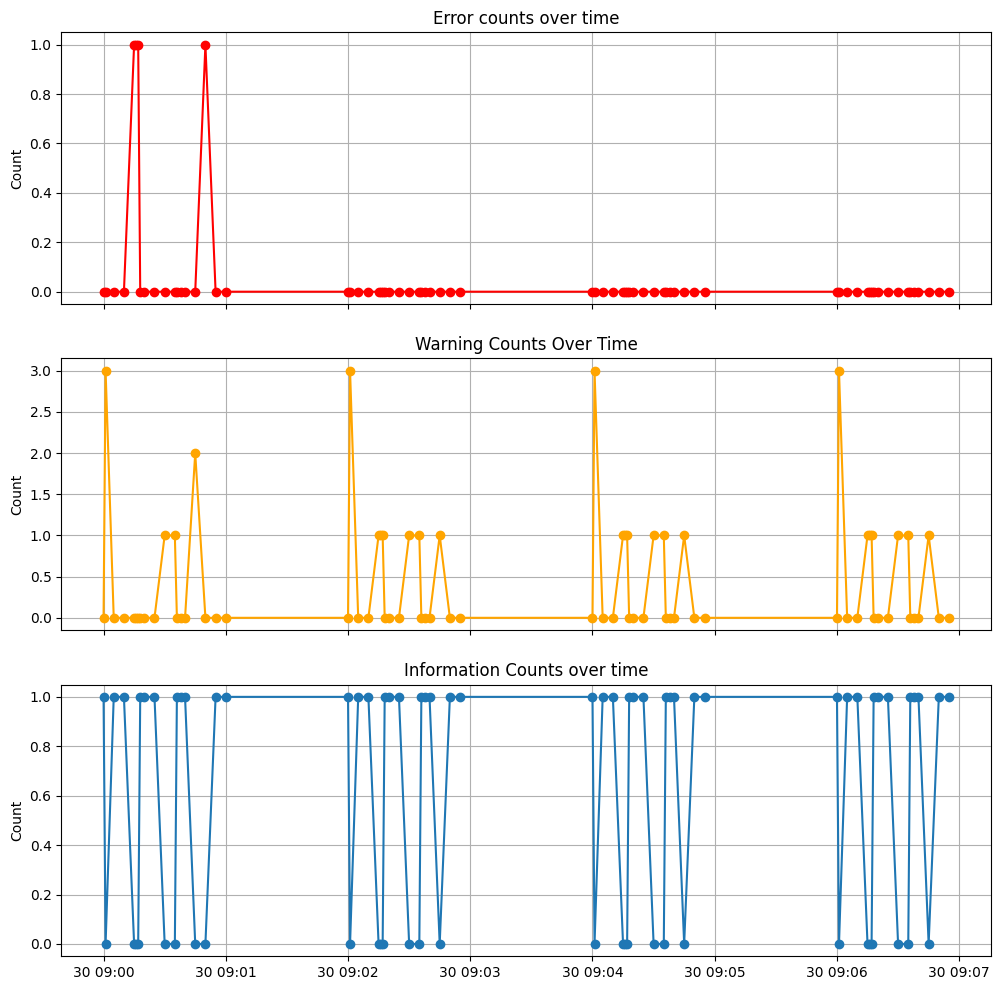

In [21]:
# Creating three empty subplots:
fig, axes= plt.subplots(nrows=3,ncols=1,figsize=(12,12),sharex=True)
# fig represents the whole figure
# axes is the array that contains the three created plots

# Now we're plotting the error log entries:
axes[0].plot(pivot_df['Timestamp'],pivot_df['error'], marker='o',label='Error',color='red')
axes[0].set_ylabel('Count')
axes[0].set_title('Error counts over time')
axes[0].grid(True)

# Now we will plot the warnings log entries on the second subplot
axes[1].plot(pivot_df['Timestamp'], pivot_df["warning"], marker='o', label="Warning", color="orange")
axes[1].set_ylabel('Count')
axes[1].set_title('Warning Counts Over Time')
axes[1].grid(True)

# Finally, we will plot the information log entries:
axes[2].plot(pivot_df['Timestamp'], pivot_df['information'], marker='o',label='Information')
axes[2].set_ylabel('Count')
axes[2].set_title('Information Counts over time')
axes[2].grid(True)

From the plotted lines, it is evident that the number of errors is very low compared to the frequency of information and warning log entries.<br>It's important to note that information log entries are typically of limited utility, primarily serving detailed investigations, and thus, there is no necessity to explore correlations with other event types.<br>Conversely, the error count remains near zero, suggesting 
minimal variation concerning the other event types.<br><br>
For these reasons, segregating the three lines enhances the clarity of our plot, facilitating a more 
straightforward examination of each type of log entry